In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.csv')
display(math.head(10))
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Рассмотрим датасет. Посмотрим данные - каждый столбец на наличие пустых строк и рассмотрим категории столюцов!

In [31]:
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Переименуем столбцы

In [32]:
math=math.rename(columns={'Pstatus':'status','Medu':'medu','Fedu':'fedu','Mjob':'mjob','Fjob':'fjob','studytime, granular':'studytime_granular'})
math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'status', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Напишем функцию для поиска пустых значений
Тут ВСЕ


In [51]:
math.score = math.score.apply(lambda x:None if x == ''  else x)
display(pd.DataFrame(math.score.value_counts()))
print("учеников, у которых бал ниже 50:"#Число 10 взято для ориентира, можно брать другое
      , (math.score.value_counts()<50).sum())
math.loc[:, ['score']].info()

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


учеников, у которых бал ниже 50: 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [47]:
def count_unique(columns):
    print(math.columns.nunique())
    plt.plot(columns)

30


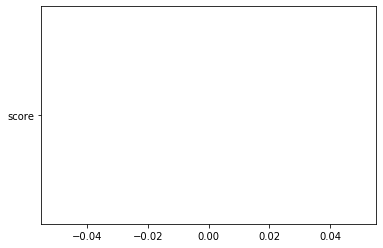

In [35]:
for col in ['score']:
    count_unique(col)

Попробуем отфильтровать лишние данные и выведем только те компании, у которых непустые значения

In [36]:
math.address = math.address.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.address.value_counts()))
print("Ненулевых значений:"#Число 10 взято для ориентира, можно брать другое
      , (math.address.value_counts()).sum())
math.loc[:, ['address']].info()


,address
U,295
R,83


Ненулевых значений: 378
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

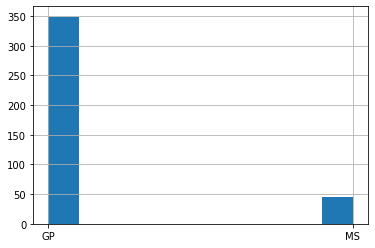

In [37]:
math.school.hist()
math.school.describe()

Напишем функцию для заполнения пропусков нечисловых столбцов

In [38]:
def fill_pass_str(columns):
    math.columns = math.columns.fillna(math.columns.mode()[0])
    pd.DataFrame(math.columns.value_counts())
    display(math.head(10))
    math.info() 

In [39]:
fill_pass_str('sex')

AttributeError: 'Index' object has no attribute 'mode'

In [115]:
for col in ['school', 'sex', 'address', 'famsize', 'status',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    fill_pass_str(col)

AttributeError: 'Index' object has no attribute 'mode'

Напишем функцию заполнения пропусков числовых столбцов

In [116]:
math.freetime = math.freetime.fillna (math.freetime.mode())
pd.DataFrame(math.freetime.value_counts())
math.freetime = math.freetime.fillna(math.freetime.mode())
display(math.head(10))
math.info() 

,school,sex,age,address,famsize,status,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4,2.0,5.0,10.0,75.0
6,GP,M,16,U,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             395 non-null    object 
 4   famsize             368 non-null    object 
 5   status              350 non-null    object 
 6   medu                392 non-null    float64
 7   fedu                371 non-null    float64
 8   mjob                376 non-null    object 
 9   fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

In [124]:
def fill_pass(columns):
    math.columnse = math.columns.fillna (math.columns.mode())
    pd.DataFrame(math.columns.value_counts())
    math.columns = math.columns.fillna(math.columns.mode())
    display(math.head(10))
    math.info() 

In [125]:
for col in ['medu']:
    fill_pass(col)

AttributeError: 'Index' object has no attribute 'mean'

6


ValueError: could not convert string to float: 'math.freetime.mode()'

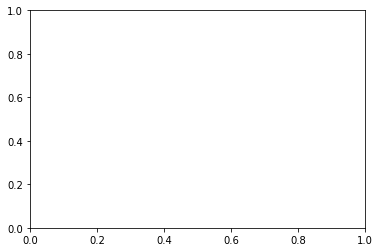

In [80]:
print(math.freetime.nunique())
plt.plot(math.freetime)

In [5]:
pd.DataFrame(math.sex.value_counts())

,sex
F,208
M,187


In [6]:
pd.DataFrame(math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

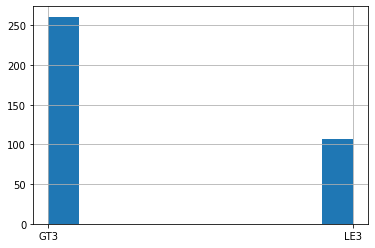

In [7]:
math.famsize.hist()
math.famsize.describe()

In [8]:
pd.DataFrame(math.score.value_counts())

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


In [9]:
math.score


0      30.0
1      30.0
2      50.0
3      75.0
4      50.0
       ... 
390    45.0
391    80.0
392    35.0
393    50.0
394    45.0
Name: score, Length: 395, dtype: float64

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

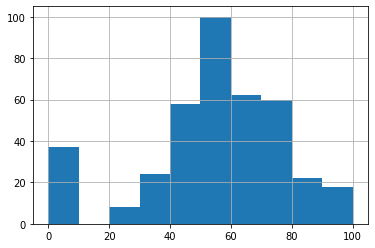

In [10]:
math.score.hist()
math.score.describe()

In [11]:
math.score = math.score.apply(lambda x: None if x == '' else x)
display(pd.DataFrame(math.score.value_counts()))

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


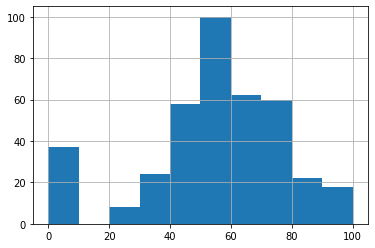

In [12]:
math.score.hist()
math.score.describe()
math.score = math.score.apply(lambda x: None if x == '' else x)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


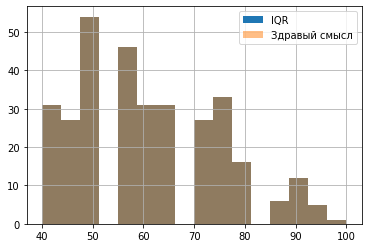

In [13]:
median = math.score.median()
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.score.loc[math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 16
                                                                                              , range = (40, 100), 
                                                                                             label = 'IQR')
math.score.loc[math.score <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100),
                                                        label = 'Здравый смысл')
plt.legend();


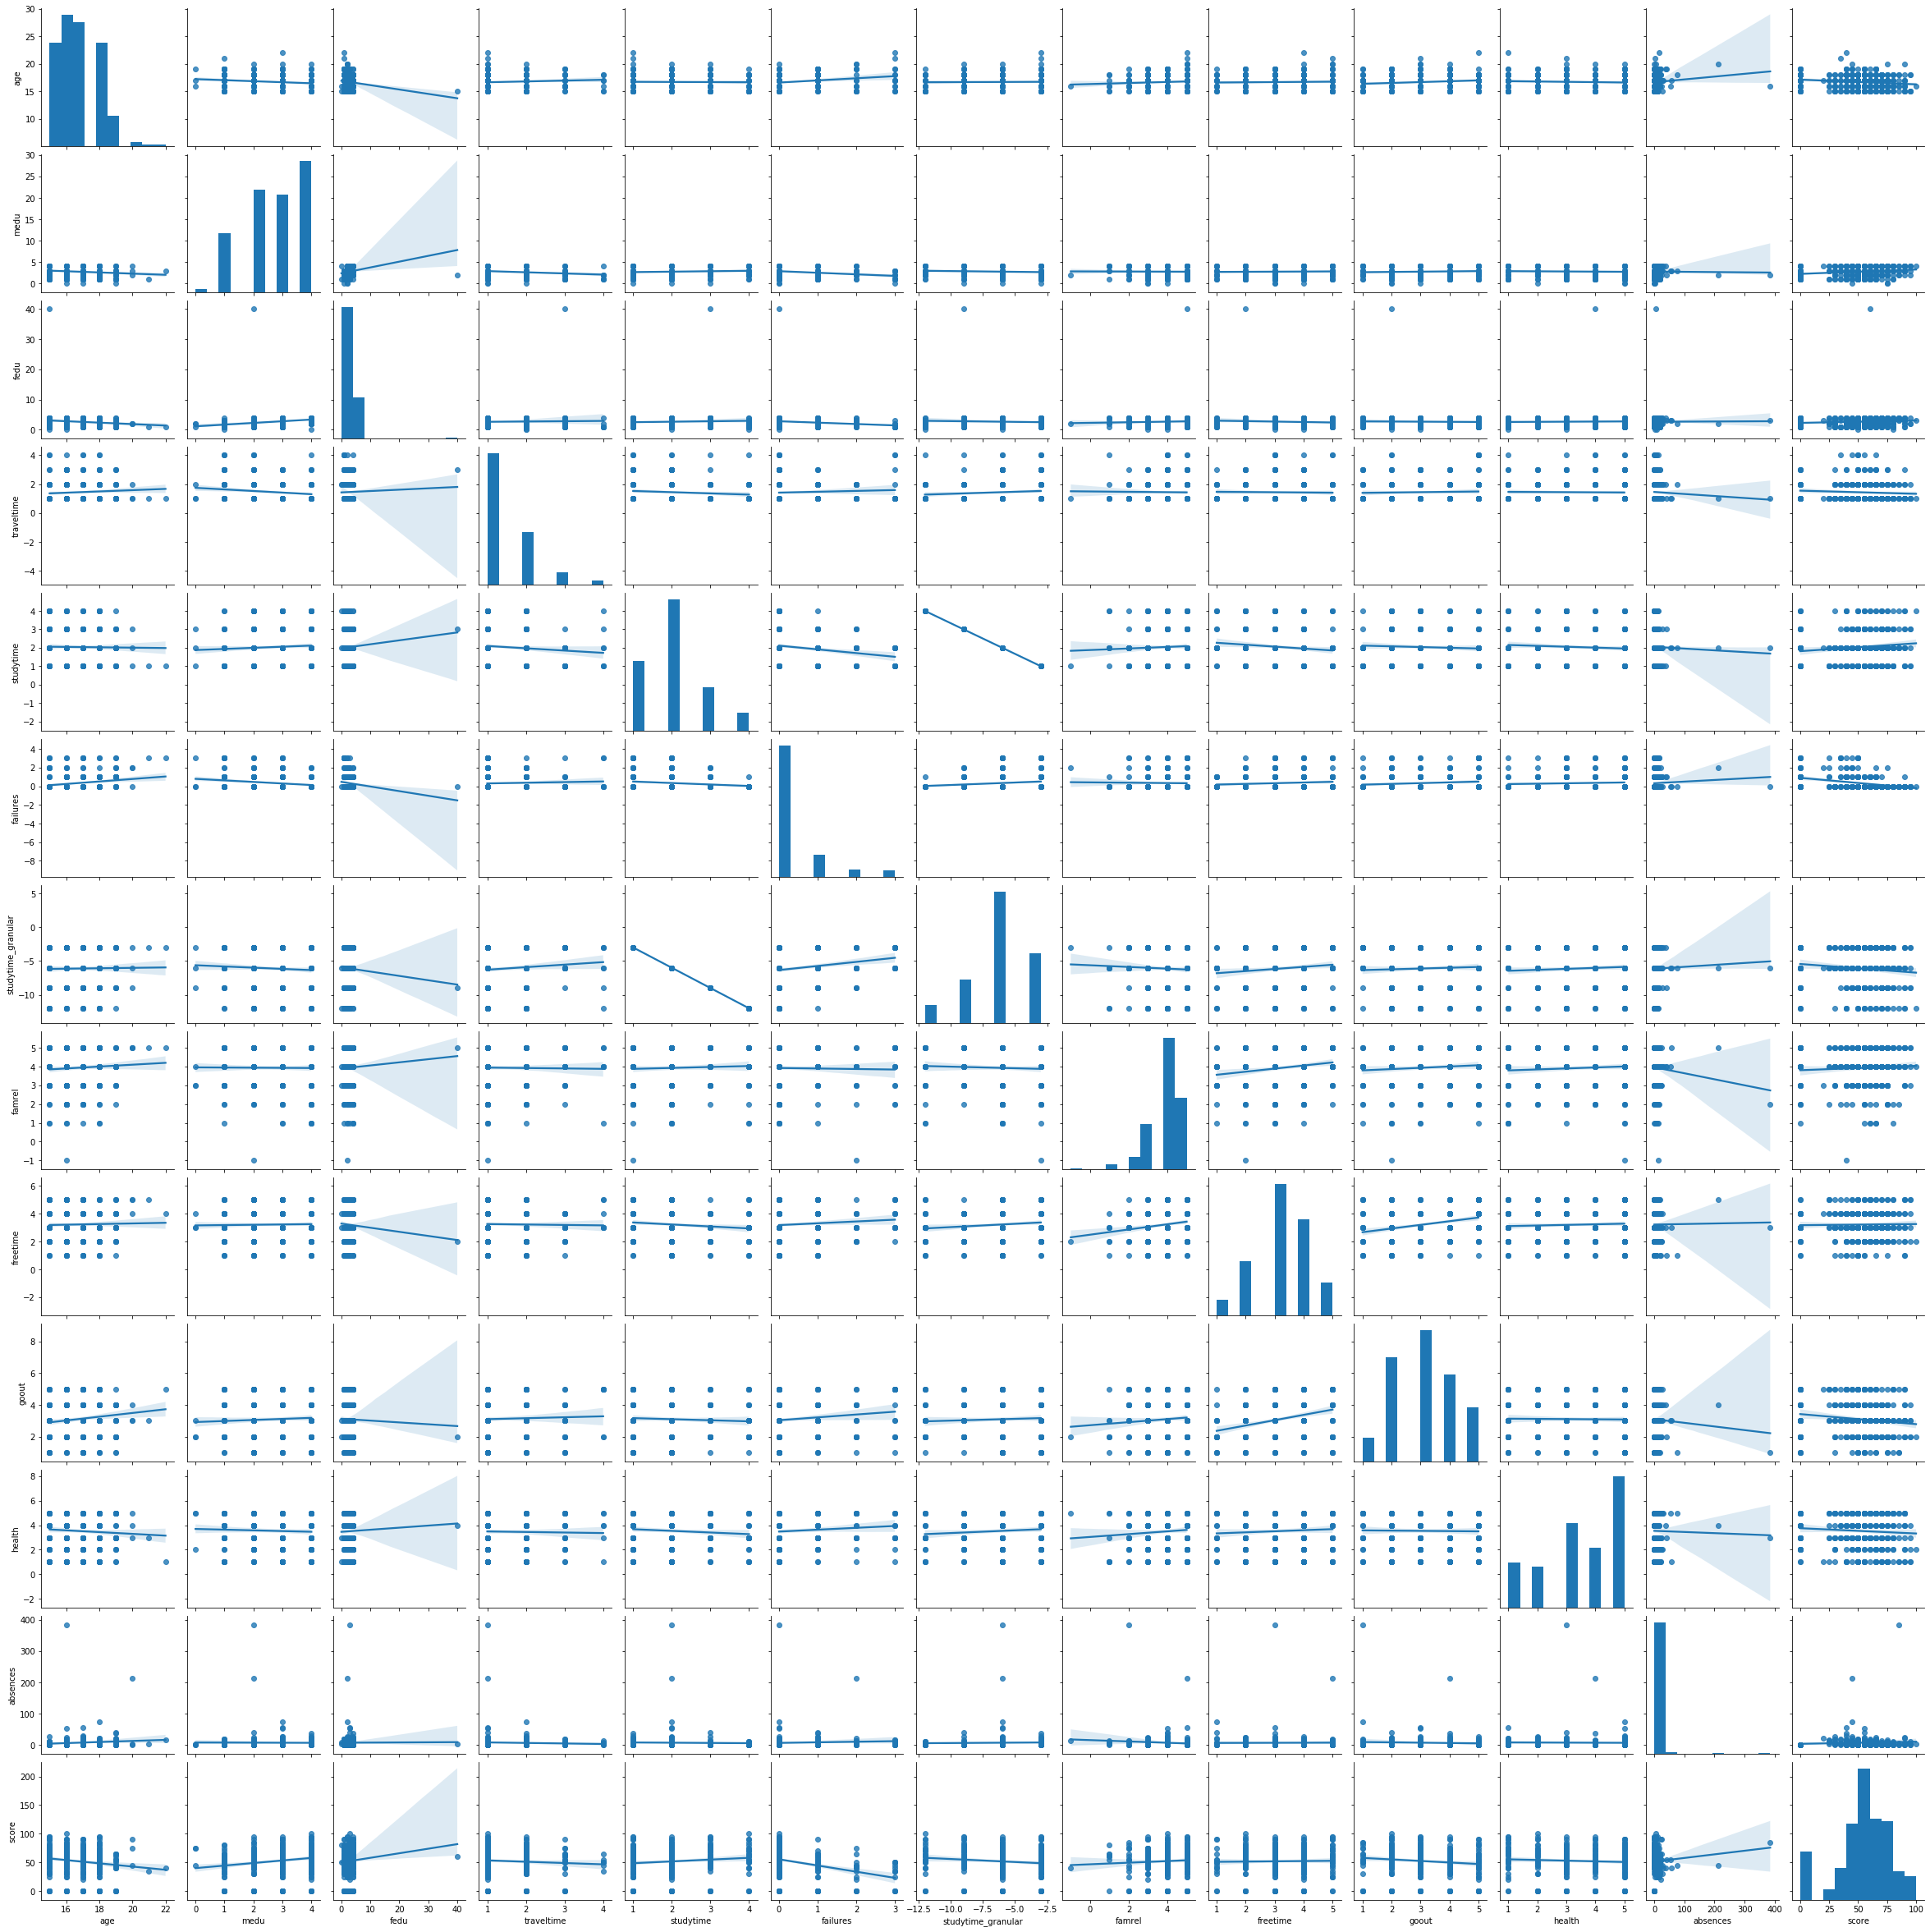

In [53]:
sns.pairplot(math, kind = 'reg')

In [15]:
math.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.015556,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726
medu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.078589,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349
fedu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,-0.057199,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,0.102206,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,-1.000000,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,0.178992,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338
studytime_granular,0.015556,-0.078589,-0.057199,0.102206,-1.000000,0.178992,1.000000,-0.045894,0.121969,0.051280,0.080016,0.026544,-0.115741
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,-0.045894,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.121969,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026
goout,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.051280,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685


In [52]:
print(cacao.bar_id.nunique())
plt.plot(cacao.bar_id)

NameError: name 'cacao' is not defined